# Run Your Sklearn Code 100X Faster
- Medium Blog Link:
- Author: [Jinhang Jiang](https://www.linkedin.com/in/jinhangjiang/) 
- Reference: https://intel.github.io/scikit-learn-intelex/

### Install Package

In [1]:
!pip install scikit-learn-intelex

### Import Necessary Packages

In [12]:
from sklearnex import patch_sklearn, unpatch_sklearn
from sklearn.datasets import make_classification, make_regression, make_moons
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from xgboost import XGBClassifier

### Random Forest - Regressor

In [13]:
patch_sklearn()
from sklearn.ensemble import RandomForestRegressor

score_1 = []
time_lapse_1 = []

for i in range(1,6):
  print(i)
  X, y = make_regression(n_samples = 10**i, n_features= 30, n_informative=25, random_state=42)
  tic = time.time()
  model = RandomForestRegressor().fit(X, y)
  toc = time.time()
  score_1.append(model.score(X,y))
  time_lapse_1.append(round(1000*(toc - tic),4))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


1
2
3
4
5


In [14]:
unpatch_sklearn()
from sklearn.ensemble import RandomForestRegressor

score_2 = []
time_lapse_2 = []

for i in range(1,6):
  print(i)
  X, y = make_regression(n_samples = 10**i, n_features= 30, n_informative=25, random_state=42)
  tic = time.time()
  model = RandomForestRegressor(random_state=42).fit(X, y)
  toc = time.time()
  score_2.append(model.score(X,y))
  time_lapse_2.append(round(1000*(toc - tic),4))

1
2
3
4
5


In [15]:
results = pd.DataFrame({'Size':[10**i for i in range(1,6)],
              'Boost_Score':score_1, 
              'Boost_Time (ms)':time_lapse_1,
              'Normal_Score':score_2, 
              'Normal_Time (ms)':time_lapse_2,
              'Speed_X':[round(a/b,4) for a,b in zip(time_lapse_2,time_lapse_1)]})

display(results)

,Size,Boost_Score,Boost_Time (ms),Normal_Score,Normal_Time (ms),Speed_X
0,10,0.815919,38.5144,0.767732,112.2224,2.9138
1,100,0.906126,59.1242,0.902497,398.0510,6.7325
2,1000,0.924621,428.0956,0.939306,1641.2847,3.8339
3,10000,0.960480,3991.8075,0.961240,21574.1253,5.4046
4,100000,0.970500,49384.6674,0.971543,323309.6039,6.5468


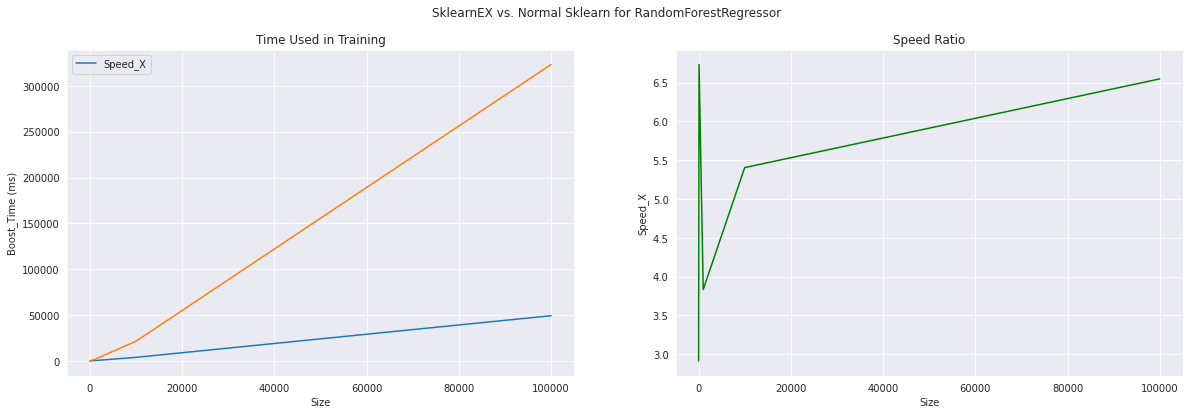

In [16]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
 
fig.suptitle('SklearnEX vs. Normal Sklearn for RandomForestRegressor')


sns.lineplot(ax=axes[0], data = results, x='Size', y='Boost_Time (ms)')
sns.lineplot(ax=axes[0], data = results, x='Size', y='Normal_Time (ms)')
sns.lineplot(ax=axes[1], data = results, x='Size', y='Speed_X', color='green')

 
axes[0].set_title('Time Used in Training')
axes[1].set_title('Speed Ratio')
axes[0].legend(['Boost_Time (ms)', 'Normal_Time (ms)'])
axes[0].legend(['Speed_X'])

### SVC - Classification

In [7]:
patch_sklearn()
from sklearn.svm import SVC

score_1 = []
time_lapse_1 = []

for i in range(1,6):
  print(i)
  X, y = make_classification(n_samples = 10**i, n_features= 30, n_informative=25, random_state=42)
  tic = time.time()
  model = SVC(gamma='auto').fit(X, y)
  toc = time.time()
  score_1.append(model.score(X,y))
  time_lapse_1.append(round(1000*(toc - tic),4))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


1
2
3
4
5


In [8]:
unpatch_sklearn()
from sklearn.svm import SVC

score_2 = []
time_lapse_2 = []

for i in range(1,6):
  print(i)
  X, y = make_classification(n_samples = 10**i, n_features= 30, n_informative=25, random_state=42)
  tic = time.time()
  model = SVC(gamma='auto').fit(X, y)
  toc = time.time()
  score_2.append(model.score(X,y))
  time_lapse_2.append(round(1000*(toc - tic),4))

1
2
3
4
5


In [11]:
results = pd.DataFrame({'Size':[10**i for i in range(1,6)],
              'Boost_Score':score_1, 
              'Boost_Time (ms)':time_lapse_1,
              'Normal_Score':score_2, 
              'Normal_Time (ms)':time_lapse_2,
              'Speed_X':[round(a/b,4) for a,b in zip(time_lapse_2,time_lapse_1)]})
display(results)

,Size,Boost_Score,Boost_Time (ms),Normal_Score,Normal_Time (ms),Speed_X
0,10,1.00000,93.9717,1.00000,4.448700e+00,0.0473
1,100,1.00000,6.4032,1.00000,1.467700e+00,0.2292
2,1000,1.00000,42.9831,1.00000,8.252600e+01,1.9200
3,10000,1.00000,2946.8279,1.00000,1.886650e+04,6.4023
4,100000,0.99968,153129.0050,0.99968,4.961833e+06,32.4030


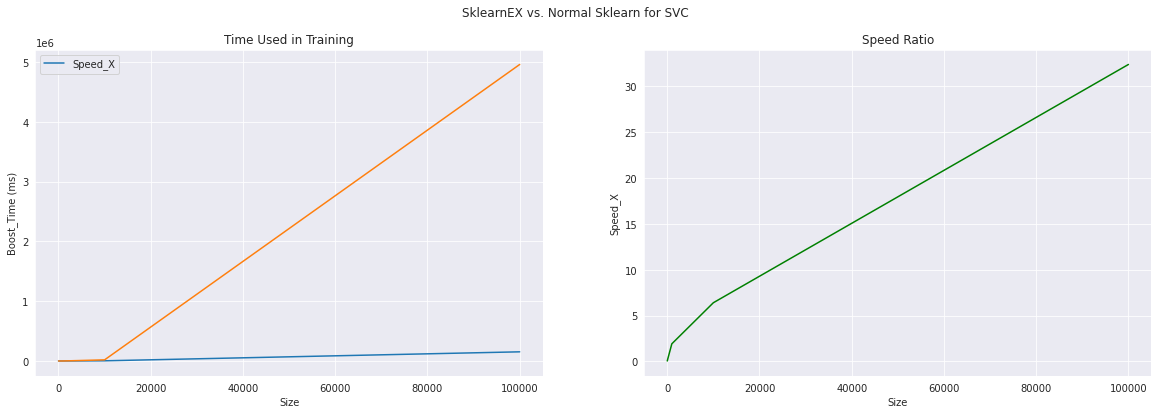

In [12]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
 
fig.suptitle('SklearnEX vs. Normal Sklearn for SVC')


sns.lineplot(ax=axes[0], data = results, x='Size', y='Boost_Time (ms)')
sns.lineplot(ax=axes[0], data = results, x='Size', y='Normal_Time (ms)')
sns.lineplot(ax=axes[1], data = results, x='Size', y='Speed_X', color='green')

 
axes[0].set_title('Time Used in Training')
axes[1].set_title('Speed Ratio')
axes[0].legend(['Boost_Time (ms)', 'Normal_Time (ms)'])
axes[0].legend(['Speed_X'])

### DBSCAN

In [2]:
score_1 = []
time_lapse_1 = []
score_2 = []
time_lapse_2 = []

for i in [100, 1000, 10000, 75000]:
  print(i)
  patch_sklearn()
  from sklearn.cluster import DBSCAN
  X, y = make_moons(n_samples = i, noise=0.3, random_state=42)
  tic = time.time()
  model = DBSCAN(eps=1).fit_predict(X)
  toc = time.time()
  score_1.append(accuracy_score(y,model))
  time_lapse_1.append(round(1000*(toc - tic),4))

  unpatch_sklearn()
  from sklearn.cluster import DBSCAN
  tic = time.time()
  model = DBSCAN(eps=1).fit_predict(X)
  toc = time.time()
  score_2.append(accuracy_score(y,model))
  time_lapse_2.append(round(1000*(toc - tic),4))

100
1000
10000


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


75000


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [14]:
results = pd.DataFrame({'Size':[100, 1000, 10000, 75000],
              'Boost_Score':score_1, 
              'Boost_Time (ms)':time_lapse_1,
              'Normal_Score':score_2, 
              'Normal_Time (ms)':time_lapse_2,
              'Speed_X':[round(a/b,4) for a,b in zip(time_lapse_2,time_lapse_1)]})
display(results)

,Size,Boost_Score,Boost_Time (ms),Normal_Score,Normal_Time (ms),Speed_X
0,10,0.4,2.5194,0.4,1.0283,0.4082
1,100,0.5,1.7815,0.5,1.9610,1.1008
2,1000,0.5,52.0098,0.5,16.7069,0.3212
3,10000,0.5,574.8358,0.5,919.7056,1.5999
4,70000,0.5,30790.2868,0.5,37789.9411,1.2273


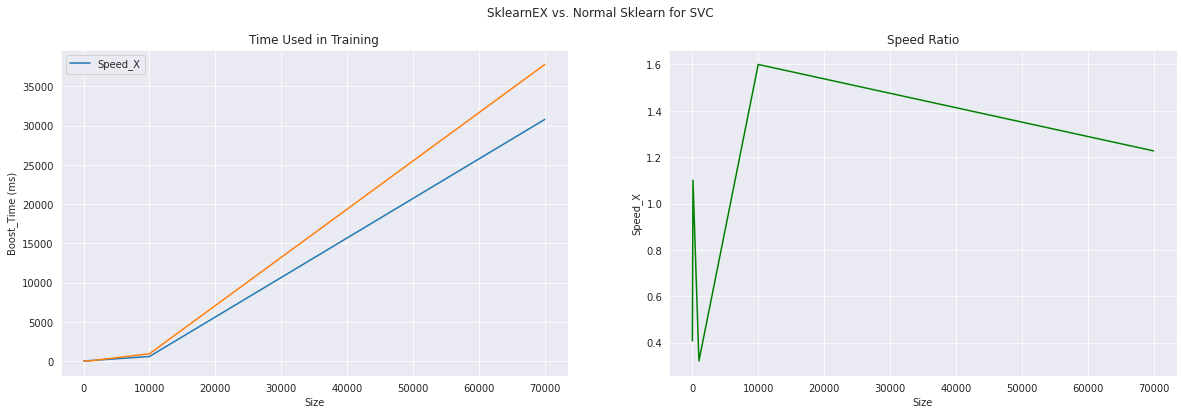

In [15]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
 
fig.suptitle('SklearnEX vs. Normal Sklearn for SVC')


sns.lineplot(ax=axes[0], data = results, x='Size', y='Boost_Time (ms)')
sns.lineplot(ax=axes[0], data = results, x='Size', y='Normal_Time (ms)')
sns.lineplot(ax=axes[1], data = results, x='Size', y='Speed_X', color='green')

 
axes[0].set_title('Time Used in Training')
axes[1].set_title('Speed Ratio')
axes[0].legend(['Boost_Time (ms)', 'Normal_Time (ms)'])
axes[0].legend(['Speed_X'])

### Random Forest vs. XGBoost

In [21]:
score_1 = []
time_lapse_1 = []
score_2 = []
time_lapse_2 = []
score_3 = []
time_lapse_3 = []

for i in range(1,6):
  print(i)
  patch_sklearn()
  from sklearn.ensemble import RandomForestClassifier
  X, y = make_classification(n_samples = 10**i, n_features= 30, n_informative=25, random_state=42)
  tic = time.time()
  model = RandomForestClassifier(random_state = 42).fit(X, y)
  toc = time.time()
  score_1.append(accuracy_score(y,model.predict(X)))
  time_lapse_1.append(round(1000*(toc - tic),4))

  unpatch_sklearn()
  from sklearn.ensemble import RandomForestClassifier
  tic = time.time()
  model = RandomForestClassifier(random_state=42).fit(X, y)
  toc = time.time()
  score_2.append(model.score(X,y))
  time_lapse_2.append(round(1000*(toc - tic),4))


  tic = time.time()
  model = XGBClassifier(random_state = 42).fit(X, y)
  toc = time.time()
  score_3.append(model.score(X,y))
  time_lapse_3.append(round(1000*(toc - tic),4))


1
2


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


3


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


4


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


5


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [27]:
results = pd.DataFrame({'Size':[10**i for i in range(1,6)],
              'Boost_Score':score_1, 
              'Boost_Time (ms)':time_lapse_1,
              'Normal_Score':score_2, 
              'Normal_Time (ms)':time_lapse_2,
              'XGB_Score':score_3, 
              'XGB_Time (ms)':time_lapse_3,
              'Speed_X_RR':[round(a/b,4) for a,b in zip(time_lapse_2,time_lapse_1)],
              'Speed_X_RX':[round(a/b,4) for a,b in zip(time_lapse_3,time_lapse_1)],
              'Speed_X_XR':[round(a/b,4) for a,b in zip(time_lapse_3,time_lapse_2)]})
display(results)

,Size,Boost_Score,Boost_Time (ms),Normal_Score,Normal_Time (ms),XGB_Score,XGB_Time (ms),Speed_X_RR,Speed_X_RX,Speed_X_XR
0,10,1.0,34.4417,1.0,125.0069,1.00000,9.3575,3.6295,0.2717,0.0749
1,100,1.0,41.6358,1.0,145.6921,1.00000,29.5722,3.4992,0.7103,0.2030
2,1000,1.0,93.3051,1.0,447.7971,0.98000,225.9173,4.7993,2.4213,0.5045
3,10000,1.0,699.5680,1.0,4793.9956,0.92370,2142.9324,6.8528,3.0632,0.4470
4,100000,1.0,6795.5804,1.0,72917.0070,0.87299,24787.7166,10.7301,3.6476,0.3399


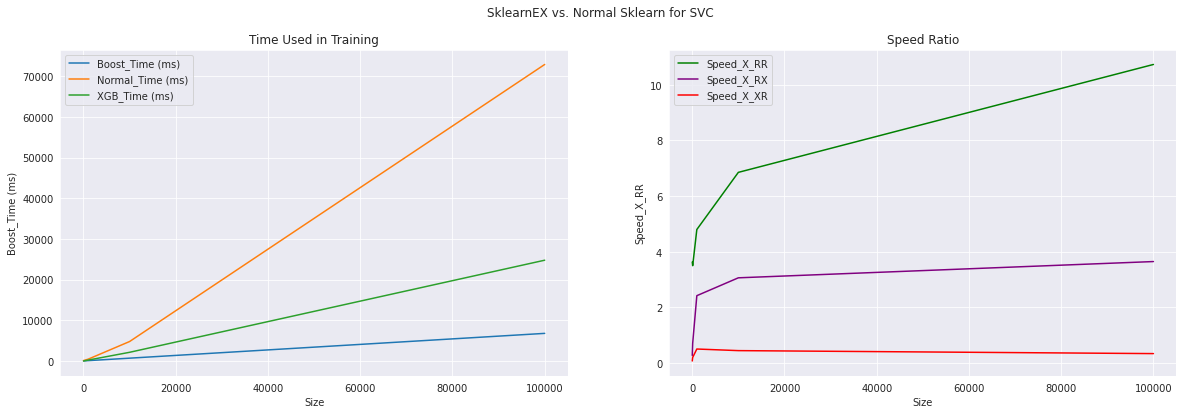

In [30]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
 
fig.suptitle('SklearnEX vs. Normal Sklearn for SVC')


sns.lineplot(ax=axes[0], data = results, x='Size', y='Boost_Time (ms)')
sns.lineplot(ax=axes[0], data = results, x='Size', y='Normal_Time (ms)')
sns.lineplot(ax=axes[0], data = results, x='Size', y='XGB_Time (ms)')
sns.lineplot(ax=axes[1], data = results, x='Size', y='Speed_X_RR', color='green')
sns.lineplot(ax=axes[1], data = results, x='Size', y='Speed_X_RX', color='purple')
sns.lineplot(ax=axes[1], data = results, x='Size', y='Speed_X_XR', color='red')

 
axes[0].set_title('Time Used in Training')
axes[1].set_title('Speed Ratio')
axes[0].legend(['Boost_Time (ms)', 'Normal_Time (ms)', 'XGB_Time (ms)'])
axes[1].legend(['Speed_X_RR','Speed_X_RX','Speed_X_XR'])